<a href="https://colab.research.google.com/github/vasudhab21/ML-LAB/blob/main/ML_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls -lh "/content/drive/MyDrive/GenomeDetector/data/natural/rickettsiales.zip"

-rw------- 1 root root 124M Jul 26 16:57 /content/drive/MyDrive/GenomeDetector/data/natural/rickettsiales.zip


In [3]:
unzip_path = "/content/drive/MyDrive/GenomeDetector/data/natural/unzipped_rickettsiales"
zip_file_path = "/content/drive/MyDrive/GenomeDetector/data/natural/rickettsiales.zip"

!unzip -o "{zip_file_path}" -d "{unzip_path}"

Archive:  /content/drive/MyDrive/GenomeDetector/data/natural/rickettsiales.zip
  inflating: /content/drive/MyDrive/GenomeDetector/data/natural/unzipped_rickettsiales/README.md  
  inflating: /content/drive/MyDrive/GenomeDetector/data/natural/unzipped_rickettsiales/ncbi_dataset/data/assembly_data_report.jsonl  
  inflating: /content/drive/MyDrive/GenomeDetector/data/natural/unzipped_rickettsiales/ncbi_dataset/data/GCF_000007025.1/GCF_000007025.1_ASM702v1_genomic.fna  
  inflating: /content/drive/MyDrive/GenomeDetector/data/natural/unzipped_rickettsiales/ncbi_dataset/data/GCF_000008045.1/GCF_000008045.1_ASM804v1_genomic.fna  
  inflating: /content/drive/MyDrive/GenomeDetector/data/natural/unzipped_rickettsiales/ncbi_dataset/data/GCF_000008385.1/GCF_000008385.1_ASM838v1_genomic.fna  
  inflating: /content/drive/MyDrive/GenomeDetector/data/natural/unzipped_rickettsiales/ncbi_dataset/data/GCF_000012385.1/GCF_000012385.1_ASM1238v1_genomic.fna  
  inflating: /content/drive/MyDrive/GenomeDetec

In [4]:
!pip install biopython

import numpy as np
from itertools import product
from Bio import SeqIO
import glob
import os

# Generates all possible k-mers for a given k
def get_kmer_features(k):
    letters = ['A', 'C', 'G', 'T']
    return sorted([''.join(p) for p in product(letters, repeat=k)])

# Converts a DNA sequence into a vector of k-mer counts
def sequence_to_kmer_counts(sequence, k, kmer_features):
    kmer_counts = {kmer: 0 for kmer in kmer_features}
    for i in range(len(sequence) - k + 1):
        kmer = sequence[i:i+k].upper()
        if kmer in kmer_counts:
            kmer_counts[kmer] += 1
    return list(kmer_counts.values())


# Loads and processes the data
def load_and_process_genera(natural_path, k):
    X, y = [], []
    kmer_features = get_kmer_features(k)

    search_pattern = os.path.join(natural_path, "ncbi_dataset", "data", "**", "*.fna")
    natural_files = glob.glob(search_pattern, recursive=True)

    if not natural_files:
        print("error")
        return np.array(X), np.array(y)

    for filepath in natural_files:
        for record in SeqIO.parse(filepath, "fasta"):
            organism_name = record.description.lower()
            if len(record.seq) < 1000: continue

            label = -1
            if "rickettsia" in organism_name: label = 0
            elif "wolbachia" in organism_name: label = 1

            if label != -1:
                X.append(sequence_to_kmer_counts(str(record.seq), k, kmer_features))
                y.append(label)

    return np.array(X), np.array(y)

K_VALUE = 4
natural_data_path = '/content/drive/MyDrive/GenomeDetector/data/natural'

print(f"\nProcessing data using k={K_VALUE}...")
X, y = load_and_process_genera(natural_data_path, K_VALUE)

print(f"Data processing complete.")
print(f"Shape of our feature matrix X: {X.shape}")
print(f"Shape of our label vector y: {y.shape}")
print(f"Number of Rickettsia samples (class 0): {np.sum(y == 0)}")
print(f"Number of Wolbachia samples (class 1): {np.sum(y == 1)}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 34.8 MB/s eta 0:00:00

Processing data using k=4...
Data processing complete.
Shape of our feature matrix X: (274, 256)
Shape of our label vector y: (274,)
Number of Rickettsia samples (class 0): 39
Number of Wolbachia samples (class 1): 235


In [8]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

project_path = '/content/drive/MyDrive/GenomeDetector'
natural_data_path = os.path.join(project_path, 'data', 'natural')

!mkdir -p {natural_data_path}

print(f"Project directory is set to: {project_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Project directory is set to: /content/drive/MyDrive/GenomeDetector


In [9]:
# Install the necessary NCBI tools
!pip install ncbi-datasets-pylib > /dev/null

# Define the full path for the zip file
zip_file_path = os.path.join(natural_data_path, 'rickettsiales.zip')

# Dowload natural dataset
print("downloading")
if not os.path.exists(zip_file_path):
    !datasets download genome taxon "Rickettsiales" --reference --assembly-level complete --filename "{zip_file_path}"
else:
    print("zip file already exists")

print("\nUnzipping the dataset... this is essential!")
!unzip -o "{zip_file_path}" -d "{natural_data_path}/"
print("Unzip complete.")

print("\nVerifying contents:")
!ls -lR "{natural_data_path}"

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.23.0 which is incompatible.
google-adk 1.11.0 requires python-dateutil<3.0.0,>=2.9.0.post0, but you have python-dateutil 2.8.2 which is incompatible.
tensorflow-metadata 1.17.2 requires protobuf>=4.25.2; python_version >= "3.11", but you have protobuf 4.23.0 which is incompatible.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 4.23.0 which is incompatible.
downloading
zip file already exists

Unzipping the dataset... this is essential!
Archive:  /content/drive/MyDrive/GenomeDetector/data/natural/rickettsiales.zip
  inflating: /content/drive/MyDrive/GenomeDetector/data/natural/README.md  
  inflating: /content/drive/MyDrive/GenomeDetector/data/natural/ncbi_d

In [13]:
!pip install biopython

import numpy as np
from itertools import product
from Bio import SeqIO
import glob
import os
import matplotlib.pyplot as plt
import numpy as np


# Generates all possible k-mers for a given k
def get_kmer_features(k):
    letters = ['A', 'C', 'G', 'T']
    return sorted([''.join(p) for p in product(letters, repeat=k)])

# Converts a DNA sequence into a vector of k-mer counts
def sequence_to_kmer_counts(sequence, k, kmer_features):
    kmer_counts = {kmer: 0 for kmer in kmer_features}
    for i in range(len(sequence) - k + 1):
        kmer = sequence[i:i+k].upper()
        if kmer in kmer_counts:
            kmer_counts[kmer] += 1
    return list(kmer_counts.values())

# Loads and preproceses the data
def load_and_process_genera(natural_path, k):
    X, y = [], []
    kmer_features = get_kmer_features(k)

    # This is the search path that finds the unzipped files
    search_pattern = os.path.join(natural_path, "ncbi_dataset", "data", "**", "*.fna")
    natural_files = glob.glob(search_pattern, recursive=True)

    if not natural_files:
        print("error")
        return np.array(X), np.array(y)

    for filepath in natural_files:
        for record in SeqIO.parse(filepath, "fasta"):
            organism_name = record.description.lower()
            if len(record.seq) < 1000: continue

            label = -1
            if "rickettsia" in organism_name: label = 0
            elif "wolbachia" in organism_name: label = 1

            if label != -1:
                X.append(sequence_to_kmer_counts(str(record.seq), k, kmer_features))
                y.append(label)

    return np.array(X), np.array(y)

K_VALUE = 4
natural_data_path = '/content/drive/MyDrive/GenomeDetector/data/natural'

print(f"\nProcessing data using k={K_VALUE}...")
X, y = load_and_process_genera(natural_data_path, K_VALUE)

print(f"Data processing complete.")
print(f"Shape of our feature matrix X: {X.shape}")
print(f"Shape of our label vector y: {y.shape}")
print(f"Number of Rickettsia samples (class 0): {np.sum(y == 0)}")
print(f"Number of Wolbachia samples (class 1): {np.sum(y == 1)}")


Processing data using k=4...
Data processing complete.
Shape of our feature matrix X: (274, 256)
Shape of our label vector y: (274,)
Number of Rickettsia samples (class 0): 39
Number of Wolbachia samples (class 1): 235


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report
)

# A1
def analyze_classes(X, y):
    # Splitting into classes
    class0 = X[y == 0]
    class1 = X[y == 1]

    # Calculating centroid
    mean0 = np.mean(class0, axis=0)
    mean1 = np.mean(class1, axis=0)

    # Calculating spread
    spread0 = np.std(class0, axis=0)
    spread1 = np.std(class1, axis=0)

    # Calculating inter class distance
    inter_class_distance = np.linalg.norm(mean0 - mean1)

    return mean0, mean1, spread0, spread1, inter_class_distance


# A2
def analyze_feature_distribution(X, feature_index=10, bins=20):
    # Extracting feature
    feature_values = X[:, feature_index]
    # Calculating mean and variance
    mean_val = np.mean(feature_values)
    var_val = np.var(feature_values)

    return feature_values, mean_val, var_val, bins


# A3
def compute_minkowski_distances(vec1, vec2, max_r=10):
    # Calculating Miknowski distance
    r_values = list(range(1, max_r + 1))
    distances = [np.linalg.norm(vec1 - vec2, ord=r) for r in r_values]
    return r_values, distances


# A4
def split_data(X, y, test_size=0.3, random_state=42):
    # Splitting dataset
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)


# A5
def train_knn(X_train, y_train, k=3):
    # Training the knn model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn


# A6
def evaluate_accuracy(model, X_test, y_test):
    # Evaluating accuracy
    return model.score(X_test, y_test)


# A7
def make_predictions(model, X_test):
    # Predicted behaviour
    return model.predict(X_test)


# A8
def accuracy_vs_k(X_train, y_train, X_test, y_test, k_values):
    # Accuracy plot
    accuracies = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
    return accuracies


# A9
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Computing confusion matrix
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    # Evaluation metrics
    metrics_train = classification_report(y_train, y_train_pred, output_dict=False)
    metrics_test = classification_report(y_test, y_test_pred, output_dict=False)

    return cm_train, cm_test, metrics_train, metrics_test


*Assignment 1*

In [16]:
# A1
mean0, mean1, spread0, spread1, dist = analyze_classes(X, y)
print("Class 0 Mean:", mean0)
print("Class 1 Mean:", mean1)
print("Class 0 Spread:", spread0)
print("Class 1 Spread:", spread1)
print("Inter-class distance:", dist)

Class 0 Mean: [23763.28205128  7449.33333333 10463.94871795 19379.69230769
  6663.05128205  3860.28205128  2860.84615385  6779.25641026
  9197.58974359  7069.12820513  4351.8974359   6909.48717949
 18405.          7300.          7164.8974359  17190.
  6828.74358974  2153.41025641  3013.56410256  4861.30769231
  4054.28205128  1655.84615385  3121.56410256  4061.07692308
  2421.17948718  1805.17948718  2075.43589744  2245.41025641
  6506.53846154  3076.53846154  3097.46153846  6962.74358974
  9172.23076923  2317.33333333  4156.          7267.30769231
  7235.66666667  2861.53846154  2242.64102564  6845.94871795
  4365.46153846  2365.15384615  1831.48717949  4022.58974359
  7692.66666667  2258.71794872  2883.          6779.1025641
 17131.69230769  5974.53846154  7849.56410256 16326.64102564
  8186.69230769  3927.97435897  3227.79487179  7336.61538462
  7205.66666667  4818.74358974  3815.02564103  4809.51282051
 16771.28205128  6536.02564103  7325.53846154 19536.51282051
  9623.84615385  36

*Assignment 2*

Feature mean: 5521.2080, variance: 2022021.8509


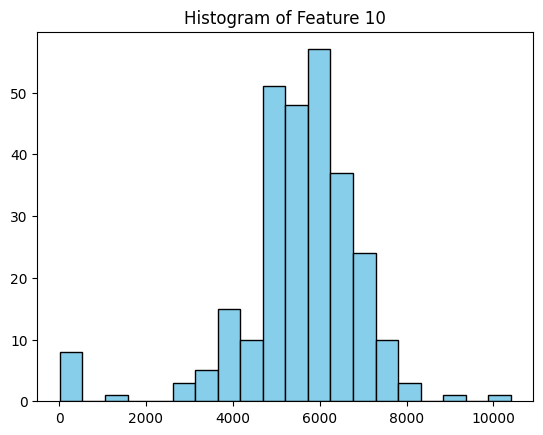

In [17]:
# A2
feature_values, mean_val, var_val, bins = analyze_feature_distribution(X, feature_index=10)
print(f"Feature mean: {mean_val:.4f}, variance: {var_val:.4f}")
plt.hist(feature_values, bins=bins, color='skyblue', edgecolor='black')
plt.title("Histogram of Feature 10")
plt.show()

*Assignment 3*


(Minkowski distances): [np.float64(183857.0), np.float64(14052.01028322994), np.float64(6464.74861280206), np.float64(4578.796379648189), np.float64(3820.178381919219), np.float64(3440.7268298663953), np.float64(3225.9763533172677), np.float64(3094.050921338785), np.float64(3007.8953023618164), np.float64(2948.8006439833493)]


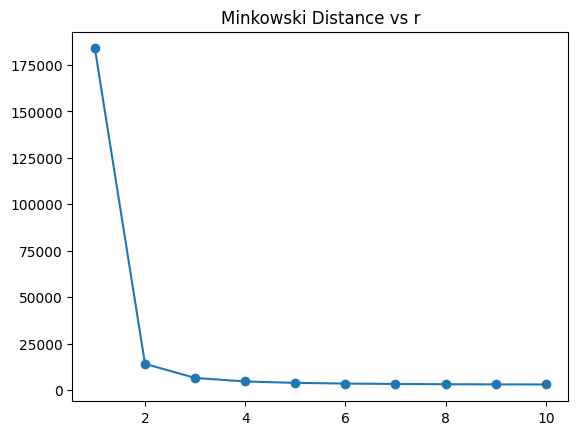

In [18]:
# A3
r_values, distances = compute_minkowski_distances(X[0], X[1])
print("\n(Minkowski distances):", distances)
plt.plot(r_values, distances, marker='o')
plt.title("Minkowski Distance vs r")
plt.show()

*Assignment 4*

In [19]:
# A4
X_train, X_test, y_train, y_test = split_data(X, y)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 191
Testing samples: 83


*Assignment 5*

In [20]:
# A5
knn = train_knn(X_train, y_train, k=3)
print("Classifier trained")

Classifier trained


*Assignment 6*

In [21]:
# A6
acc = evaluate_accuracy(knn, X_test, y_test)
print("Results: Accuracy =", acc)

Results: Accuracy = 0.9759036144578314


*Assignment 7*

In [22]:
# A7
y_pred = make_predictions(knn, X_test)
print("Predictions:", y_pred)

Predictions: [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 0 1 1 1]


*Assignment 8*

Accuracy for k=1 (NN): 0.9880
Accuracy for k=3 (kNN): 0.9759


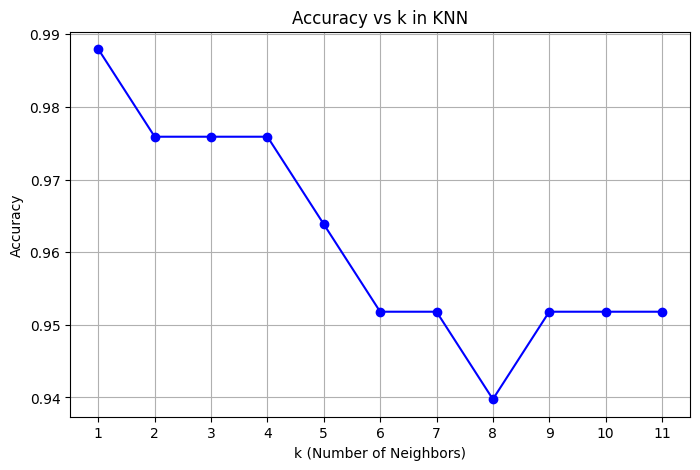

In [23]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Range of k values from 1 to 11
k_values = list(range(1, 12))
accuracies = accuracy_vs_k(X_train, y_train, X_test, y_test, k_values)

# Print comparison for k=1 and k=3
print(f"Accuracy for k=1 (NN): {accuracies[0]:.4f}")
print(f"Accuracy for k=3 (kNN): {accuracies[2]:.4f}")

# Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k in KNN")
plt.xticks(k_values)
plt.grid(True)
plt.show()


*Assignment 9*

In [24]:
# A9
cm_train, cm_test, metrics_train, metrics_test = evaluate_model(knn, X_train, y_train, X_test, y_test)
print("Confusion Matrix (Train):\n", cm_train)
print("Confusion Matrix (Test):\n", cm_test)
print("\nClassification Metrics (Train):\n", metrics_train)
print("\nClassification Metrics (Test):\n", metrics_test)

Confusion Matrix (Train):
 [[ 26   1]
 [  1 163]]
Confusion Matrix (Test):
 [[11  1]
 [ 1 70]]

Classification Metrics (Train):
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.99      0.99      0.99       164

    accuracy                           0.99       191
   macro avg       0.98      0.98      0.98       191
weighted avg       0.99      0.99      0.99       191


Classification Metrics (Test):
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.99      0.99      0.99        71

    accuracy                           0.98        83
   macro avg       0.95      0.95      0.95        83
weighted avg       0.98      0.98      0.98        83

